<a href="https://colab.research.google.com/github/ArpitRawat07/Garbage-Classification/blob/main/Waste_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d farzadnekouei/trash-type-image-dataset

Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
License(s): unknown
 42% 17.0M/40.9M [00:00<00:00, 143MB/s]
100% 40.9M/40.9M [00:00<00:00, 201MB/s]


In [ ]:
!kaggle datasets download -d akshat103/e-waste-image-dataset

Dataset URL: https://www.kaggle.com/datasets/akshat103/e-waste-image-dataset
License(s): Apache 2.0
 76% 9.00M/11.8M [00:00<00:00, 45.9MB/s]
100% 11.8M/11.8M [00:00<00:00, 57.6MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("trash-type-image-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("garbage_dataset")
with zipfile.ZipFile("e-waste-image-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("e-waste-image-dataset")

In [ ]:
# Importing Dependencies
import os
import shutil
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

In [ ]:
# New dataset folder
new_folder_path = "/content/Updated_Garbage_Dataset"
os.makedirs(new_folder_path, exist_ok=True)

In [ ]:
# Splitting to train and test
dataset_dir = "/content/garbage_dataset/TrashType_Image_Dataset"
train_dir = "/content/Updated_Garbage_Dataset/train"
test_dir = "/content/Updated_Garbage_Dataset/test"

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
# define train ratio
train_ratio = 0.7

# Walk through the dataset directory and divide the files
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)

    # Create class directories in train and test directories
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Get a list of all files in the class directory
    files = os.listdir(class_dir)
    # Shuffle the files to randomize the split
    random.shuffle(files)

    # Calculate the number of files for train and test
    num_train = int(len(files) * train_ratio)
    train_files = files[:num_train]
    test_files = files[num_train:]

    # Move train files to train directory
    for file in train_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(train_class_dir, file)
        shutil.move(src, dst)

    # Move test files to test directory
    for file in test_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(test_class_dir, file)
        shutil.move(src, dst)

In [ ]:
# Source directory containing folders
# source_directory = '/content/e-waste-image-dataset/modified-dataset/test'
source_directory = '/content/e-waste-image-dataset/modified-dataset/train'

# Destination directory where folders will be moved
# destination_directory = '/content/Updated_Garbage_Dataset/test'
destination_directory = '/content/Updated_Garbage_Dataset/train'

# List all folders in the source directory
folders = [f for f in os.listdir(source_directory) if os.path.isdir(os.path.join(source_directory, f))]

# Loop through each folder and move it to the destination directory
for folder in folders:
    source_folder_path = os.path.join(source_directory, folder)
    destination_folder_path = os.path.join(destination_directory, folder)

    # Move the folder
    shutil.move(source_folder_path, destination_folder_path)
    print(f"Moved '{folder}' to '{destination_directory}'")


Moved 'Keyboard' to '/content/Updated_Garbage_Dataset/train'
Moved 'Washing Machine' to '/content/Updated_Garbage_Dataset/train'
Moved 'Printer' to '/content/Updated_Garbage_Dataset/train'
Moved 'Player' to '/content/Updated_Garbage_Dataset/train'
Moved 'Microwave' to '/content/Updated_Garbage_Dataset/train'
Moved 'Battery' to '/content/Updated_Garbage_Dataset/train'
Moved 'Television' to '/content/Updated_Garbage_Dataset/train'
Moved 'Mobile' to '/content/Updated_Garbage_Dataset/train'
Moved 'PCB' to '/content/Updated_Garbage_Dataset/train'
Moved 'Mouse' to '/content/Updated_Garbage_Dataset/train'


In [ ]:
import os
import shutil

# Array of source folders
source_folders = ['/content/e-waste-image-dataset/modified-dataset/val/Battery', '/content/e-waste-image-dataset/modified-dataset/val/Keyboard', '/content/e-waste-image-dataset/modified-dataset/val/Microwave', '/content/e-waste-image-dataset/modified-dataset/val/Mobile', '/content/e-waste-image-dataset/modified-dataset/val/Mouse', '/content/e-waste-image-dataset/modified-dataset/val/PCB', '/content/e-waste-image-dataset/modified-dataset/val/Player', '/content/e-waste-image-dataset/modified-dataset/val/Printer', '/content/e-waste-image-dataset/modified-dataset/val/Television', '/content/e-waste-image-dataset/modified-dataset/val/Washing Machine']

# Array of destination folders
destination_folders = ['/content/Updated_Garbage_Dataset/train/Battery', '/content/Updated_Garbage_Dataset/train/Keyboard', '/content/Updated_Garbage_Dataset/train/Microwave', '/content/Updated_Garbage_Dataset/train/Mobile', '/content/Updated_Garbage_Dataset/train/Mouse', '/content/Updated_Garbage_Dataset/train/PCB', '/content/Updated_Garbage_Dataset/train/Player', '/content/Updated_Garbage_Dataset/train/Printer', '/content/Updated_Garbage_Dataset/train/Television', '/content/Updated_Garbage_Dataset/train/Washing Machine']

# Loop through each source folder
for source_folder, destination_folder in zip(source_folders, destination_folders):
    # List all files in the source folder
    files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

    # Loop through each file and move it to the destination folder
    for file in files:
        source_file_path = os.path.join(source_folder, file)
        destination_file_path = os.path.join(destination_folder, file)

        # Move the file
        shutil.move(source_file_path, destination_file_path)
        print(f"Moved '{file}' to '{destination_folder}'")


Moved 'battery_198.jpg' to '/content/Updated_Garbage_Dataset/train/Battery'
Moved 'battery_37.jpg' to '/content/Updated_Garbage_Dataset/train/Battery'
Moved 'battery_66.jpg' to '/content/Updated_Garbage_Dataset/train/Battery'
Moved 'battery_105.jpg' to '/content/Updated_Garbage_Dataset/train/Battery'
Moved 'battery_229.jpg' to '/content/Updated_Garbage_Dataset/train/Battery'
Moved 'battery_286.jpg' to '/content/Updated_Garbage_Dataset/train/Battery'
Moved 'battery_265.jpg' to '/content/Updated_Garbage_Dataset/train/Battery'
Moved 'battery_224.jpg' to '/content/Updated_Garbage_Dataset/train/Battery'
Moved 'battery_277.jpg' to '/content/Updated_Garbage_Dataset/train/Battery'
Moved 'battery_226.jpg' to '/content/Updated_Garbage_Dataset/train/Battery'
Moved 'battery_147.jpg' to '/content/Updated_Garbage_Dataset/train/Battery'
Moved 'battery_65.jpg' to '/content/Updated_Garbage_Dataset/train/Battery'
Moved 'battery_108.jpg' to '/content/Updated_Garbage_Dataset/train/Battery'
Moved 'battery_

In [ ]:
# Import helper functions we're going to use
from helper_functions import *

In [ ]:
# Walk through 10 percent data directory and list number of files
walk_through_dir("/content/Updated_Garbage_Dataset")

There are 2 directories and 0 images in '/content/Updated_Garbage_Dataset'.
There are 16 directories and 0 images in '/content/Updated_Garbage_Dataset/train'.
There are 0 directories and 270 images in '/content/Updated_Garbage_Dataset/train/Keyboard'.
There are 0 directories and 282 images in '/content/Updated_Garbage_Dataset/train/cardboard'.
There are 0 directories and 270 images in '/content/Updated_Garbage_Dataset/train/Washing Machine'.
There are 0 directories and 270 images in '/content/Updated_Garbage_Dataset/train/Printer'.
There are 0 directories and 270 images in '/content/Updated_Garbage_Dataset/train/Player'.
There are 0 directories and 415 images in '/content/Updated_Garbage_Dataset/train/paper'.
There are 0 directories and 270 images in '/content/Updated_Garbage_Dataset/train/Microwave'.
There are 0 directories and 270 images in '/content/Updated_Garbage_Dataset/train/Battery'.
There are 0 directories and 270 images in '/content/Updated_Garbage_Dataset/train/Television'.


Image shape: (384, 512, 3)


array([[[143, 120, 114],
        [143, 120, 114],
        [143, 120, 114],
        ...,
        [145, 125, 116],
        [145, 125, 116],
        [145, 125, 116]],

       [[143, 120, 114],
        [143, 120, 114],
        [144, 121, 115],
        ...,
        [145, 125, 116],
        [145, 125, 116],
        [145, 125, 116]],

       [[143, 120, 114],
        [144, 121, 115],
        [144, 121, 115],
        ...,
        [145, 125, 116],
        [145, 125, 116],
        [145, 125, 116]],

       ...,

       [[136, 116, 105],
        [136, 116, 105],
        [135, 115, 104],
        ...,
        [122, 103,  96],
        [122, 103,  96],
        [122, 103,  96]],

       [[136, 116, 105],
        [136, 116, 105],
        [135, 115, 104],
        ...,
        [122, 103,  96],
        [122, 103,  96],
        [122, 103,  96]],

       [[136, 116, 105],
        [135, 115, 104],
        [135, 115, 104],
        ...,
        [122, 103,  96],
        [122, 103,  96],
        [122, 103,  96]]], dtype=uint8)
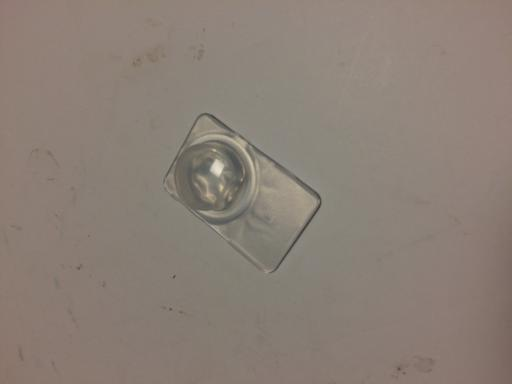

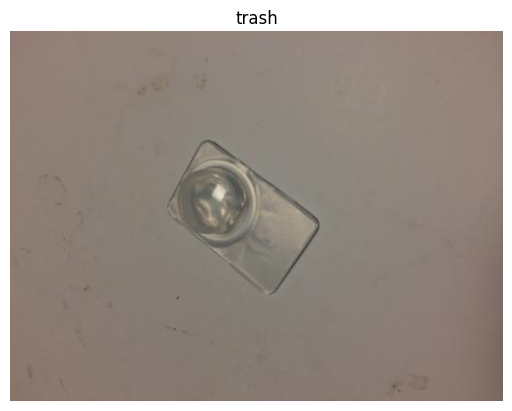

In [ ]:
# Create training and test directories
train_dir = "/content/Updated_Garbage_Dataset/train"
test_dir = "/content/Updated_Garbage_Dataset/test"

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  #Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  return img

view_random_image("/content/Updated_Garbage_Dataset/train/", "trash")

In [ ]:
IMAGE_SHAPE = (256, 256)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images")
train_data = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")
print("Test images")
test_data = test_datagen.flow_from_directory(test_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")

Training images
Found 4466 images belonging to 16 classes.
Test images
Found 1061 images belonging to 16 classes.


In [ ]:
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log file to:{log_dir}")
  return tensorboard_callback

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

def create_model(model_url, num_classes=10):
    """
    Takes a Tensorflow Hub URL and creates a Keras Functional model with it.

    Args:
        model_url (str): A Tensorflow HUB feature extraction URL.
        num_classes (int): Number of output neurons in the output layer,
            should be equal to the number of target classes, default 10.

    Returns:
        An uncompiled Keras Functional model with model_url as the feature extractor
        layer and a Dense output layer with num_classes output neurons.
    """

    # Download the pretrained model and save it as a Keras layer
    feature_extractor_layer = hub.KerasLayer(model_url,
                                             trainable=False,  # Freeze the already learned patterns
                                             name="feature_extraction_layer",
                                             input_shape=IMAGE_SHAPE + (3,))

    # Define the input tensor shape
    inputs = tf.keras.layers.Input(shape=IMAGE_SHAPE + (3,))

    # Pass the input tensor through the feature extractor layer
    features = feature_extractor_layer(inputs)

    # Add a Dense output layer
    outputs = tf.keras.layers.Dense(num_classes, activation="softmax", name="output_layer")(features)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

# Define the EfficientNet B7 URL
efficient_url = "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1"

# Create the EfficientNet B7 model
efficientnet_model = create_model(efficient_url,
                                  num_classes=train_data.num_classes)

# Compile the model
efficientnet_model.compile(loss="categorical_crossentropy",
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=["accuracy"])

# Print model summary
efficientnet_model.summary()

# Train the model
efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs=5,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub', experiment_name='EfficientNetB7')])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 feature_extraction_layer (  (None, 2560)              64097680  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 16)                40976     
                                                                 
Total params: 64138656 (244.67 MB)
Trainable params: 40976 (160.06 KB)
Non-trainable params: 64097680 (244.51 MB)
_________________________________________________________________
Saving TensorBoard log file to:tensorflow_hub/EfficientNetB7/2024-05-10_07:28:52
Epoch 1/5
140/140 [==============================] - 122s 613ms/step - loss: 0.7414 - accuracy: 0.8484 - val_loss: 0.4533 - val_ac

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=256, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    return img/255.
  else:
    return img

In [ ]:
# Make a function to predict on images and plot them (works with multi-class)
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
class_names = []

class_names.append("Battery")
class_names.append("Keyboard")
class_names.append("Microwave")
class_names.append("Mobile")
class_names.append("Mouse")
class_names.append("PCB")
class_names.append("Player")
class_names.append("Printer")
class_names.append("Television")
class_names.append("Washing Machine")
class_names.append("cardboard")
class_names.append("glass")
class_names.append("metal")
class_names.append("paper")
class_names.append("plastic")
class_names.append("trash")

In [ ]:
with zipfile.ZipFile("test_images.zip", "r") as zip_ref:
    zip_ref.extractall("test_images")

In [ ]:
efficientnet_model.save('/content/updated_efficientnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import tensorflow_hub as hub

# Define the custom objects used in the model
custom_objects = {'KerasLayer': hub.KerasLayer}

# Load the model with custom objects
loaded_model = load_model('/content/updated_efficientnet_model.h5', custom_objects=custom_objects)


1/1 [==============================] - 7s 7s/step


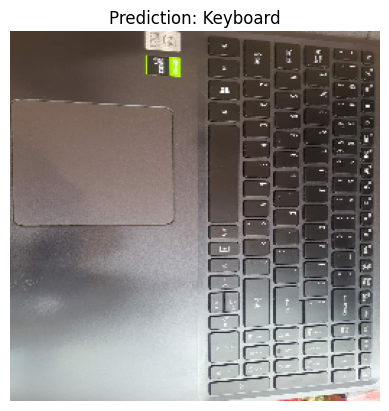

In [ ]:
# from tensorflow.keras.models import load_model
img = "/content/test_images/WhatsApp Image 2024-05-10 at 10.51.07 (1).jpeg"

pred_and_plot(efficientnet_model, img, class_names)

1/1 [==============================] - 0s 88ms/step


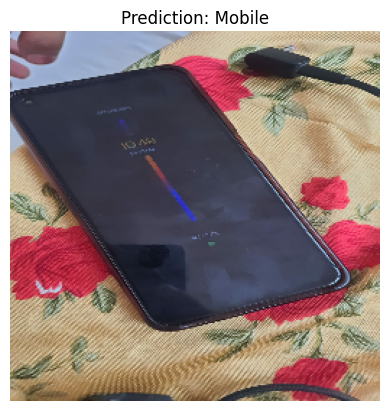

In [ ]:
# from tensorflow.keras.models import load_model
img = "/content/test_images/WhatsApp Image 2024-05-10 at 10.50.44.jpeg"

pred_and_plot(efficientnet_model, img, class_names)

1/1 [==============================] - 0s 68ms/step


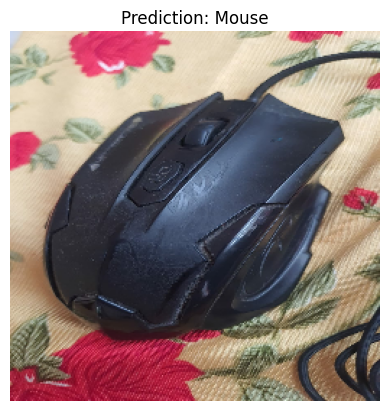

In [ ]:
# from tensorflow.keras.models import load_model
img = "/content/test_images/WhatsApp Image 2024-05-10 at 10.51.01.jpeg"

pred_and_plot(efficientnet_model, img, class_names)

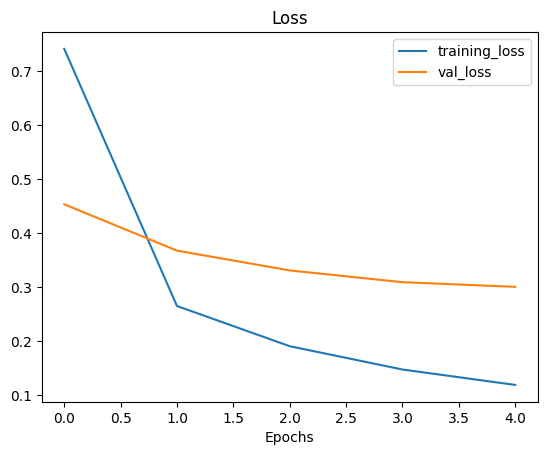

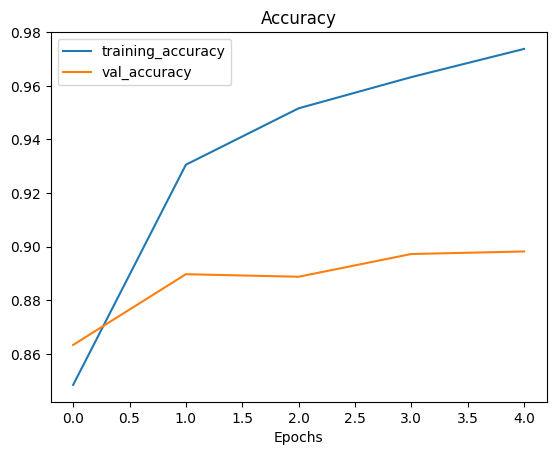

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
# Make predictions with model
pred_probs = efficientnet_model.predict(test_data)

34/34 [==============================] - 16s 399ms/step


In [ ]:
# How many predictions are there?
len(pred_probs)

1061

In [ ]:
# What's the shape of our predictions?
pred_probs.shape

(1061, 16)

In [ ]:
# How do they look?
pred_probs[:10]

array([[3.45492223e-03, 8.30544523e-05, 7.94454769e-04, 1.25536288e-03,
        9.76971933e-05, 1.23123394e-03, 2.21214979e-03, 7.73978827e-04,
        1.60778334e-04, 9.90808039e-05, 8.51299614e-02, 4.76787239e-03,
        6.56287512e-03, 7.19883680e-01, 4.62603830e-02, 1.27232596e-01],
       [1.55544389e-04, 1.38775751e-04, 1.48355048e-05, 3.26054615e-05,
        9.59143745e-06, 2.63069465e-04, 7.38519429e-06, 5.17523695e-05,
        9.75719668e-05, 7.15137503e-05, 2.58144773e-05, 9.71733153e-01,
        2.45846133e-03, 7.21313700e-05, 2.46373061e-02, 2.30359234e-04],
       [3.25667555e-03, 2.49988894e-04, 9.90992266e-05, 4.94726526e-04,
        1.09904882e-04, 2.62865535e-04, 6.02068831e-05, 1.43747311e-03,
        2.90780474e-04, 1.26676125e-04, 4.37300324e-01, 1.19712006e-03,
        2.73283129e-03, 4.75561321e-01, 7.18113780e-03, 6.96388260e-02],
       [9.00535882e-01, 5.05879230e-04, 3.69843590e-04, 1.40696461e-03,
        2.76278093e-04, 1.98921829e-04, 7.45560508e-04, 3.215

In [ ]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([13, 11, 13,  0, 14, 10, 11, 14, 10,  8])

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Make predictions on the test data
y_pred = model.predict(test_data)


# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the actual labels of the test dataset
actual_labels = []
for _, labels in test_data:
    actual_labels.extend(np.argmax(labels, axis=1))

# Calculate precision, recall, accuracy, and F1 score
precision = precision_score(actual_labels, y_pred_labels, average='weighted')
recall = recall_score(actual_labels, y_pred_labels, average='weighted')
accuracy = accuracy_score(actual_labels, y_pred_labels)
f1 = f1_score(actual_labels, y_pred_labels, average='weighted')

# Display the evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
